# MOVIE RATING PREDICTION

##### importing all the reqired libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

##### loading all the dataset

In [2]:
movies=pd.read_csv("C:/Users/Sakshi more/OneDrive/Desktop/movies.dat",sep='::',engine='python')

In [3]:
users=pd.read_csv("C:/Users/Sakshi more/OneDrive/Desktop/users.dat",sep='::',engine='python')

In [4]:
ratings=pd.read_csv("C:/Users/Sakshi more/OneDrive/Desktop/ratings.dat",sep='::',engine='python')

In [5]:
movies.head(2)

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance


##### giving names to the columns

In [6]:
movies.columns=['MovieID','MovieName','Category']

In [7]:
movies.head(2)

,MovieID,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance


In [8]:
users.head(2)

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117


##### giving names to the columns

In [9]:
users.columns=['ID','Gender','Age','occupation','Zipcode']

In [10]:
users.head(2)

,ID,Gender,Age,occupation,Zipcode
0,2,M,56,16,70072
1,3,M,25,15,55117


##### giving names to the columns

In [11]:
ratings.columns=['ID','MovieID','Ratings','Timestamp']

In [12]:
ratings.head(2)

,ID,MovieID,Ratings,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968


##### performing merge operation on the 3 seperate dataset and make it one

In [13]:
df=pd.merge(movies,ratings,on='MovieID')

In [14]:
df.head(10)

,MovieID,MovieName,Category,ID,Ratings,Timestamp
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267
1,2,Jumanji (1995),Adventure|Children's|Fantasy,13,3,978202563
2,2,Jumanji (1995),Adventure|Children's|Fantasy,18,2,978152541
3,2,Jumanji (1995),Adventure|Children's|Fantasy,23,2,978461604
4,2,Jumanji (1995),Adventure|Children's|Fantasy,27,1,978129692
5,2,Jumanji (1995),Adventure|Children's|Fantasy,40,5,978040739
6,2,Jumanji (1995),Adventure|Children's|Fantasy,44,4,1004410663
7,2,Jumanji (1995),Adventure|Children's|Fantasy,48,3,978064964
8,2,Jumanji (1995),Adventure|Children's|Fantasy,53,5,977981548
9,2,Jumanji (1995),Adventure|Children's|Fantasy,60,5,977931869


In [15]:
df=pd.merge(df,users,on='ID')

In [16]:
df.head(10)

,MovieID,MovieName,Category,ID,Ratings,Timestamp,Gender,Age,occupation,Zipcode
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,F,35,1,95370
1,7,Sabrina (1995),Comedy|Romance,10,4,978227763,F,35,1,95370
2,24,Powder (1995),Drama|Sci-Fi,10,3,978230586,F,35,1,95370
3,32,Twelve Monkeys (1995),Drama|Sci-Fi,10,5,979168160,F,35,1,95370
4,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,978230090,F,35,1,95370
5,62,Mr. Holland's Opus (1995),Drama,10,5,978227051,F,35,1,95370
6,104,Happy Gilmore (1996),Comedy,10,3,978227551,F,35,1,95370
7,110,Braveheart (1995),Action|Drama|War,10,4,978225853,F,35,1,95370
8,116,Anne Frank Remembered (1995),Documentary,10,3,979775053,F,35,1,95370
9,150,Apollo 13 (1995),Drama,10,5,978226319,F,35,1,95370


##### displaying the names of the columns of the dataset

In [17]:
df.columns

Index(['MovieID', 'MovieName', 'Category', 'ID', 'Ratings', 'Timestamp',
       'Gender', 'Age', 'occupation', 'Zipcode'],
      dtype='object')

##### displaying the information about the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     998080 non-null  int64 
 1   MovieName   998080 non-null  object
 2   Category    998080 non-null  object
 3   ID          998080 non-null  int64 
 4   Ratings     998080 non-null  int64 
 5   Timestamp   998080 non-null  int64 
 6   Gender      998080 non-null  object
 7   Age         998080 non-null  int64 
 8   occupation  998080 non-null  int64 
 9   Zipcode     998080 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.8+ MB


##### getting the description of the dataset

In [19]:
df.describe()

,MovieID,ID,Ratings,Timestamp,Age,occupation
count,998080.000000,998080.000000,998080.000000,9.980800e+05,998080.000000,998080.000000
mean,1869.434325,3024.608884,3.580357,9.722469e+08,29.744052,8.035970
std,1093.878797,1728.273821,1.117300,1.215794e+07,11.749987,6.531805
min,2.000000,2.000000,1.000000,9.567039e+08,1.000000,0.000000
25%,1034.000000,1506.000000,3.000000,9.653027e+08,25.000000,2.000000
50%,1845.000000,3070.000000,4.000000,9.730190e+08,25.000000,7.000000
75%,2772.000000,4476.000000,4.000000,9.752211e+08,35.000000,14.000000
max,3952.000000,6040.000000,5.000000,1.046455e+09,56.000000,20.000000


##### finding of the dataset contains any dupliacted value

In [20]:
df.duplicated().sum()

0

##### finding of the dataset contains any null value

In [21]:
df.isnull().sum()

MovieID       0
MovieName     0
Category      0
ID            0
Ratings       0
Timestamp     0
Gender        0
Age           0
occupation    0
Zipcode       0
dtype: int64

##### generating a countplot for the ratings of movies

Text(0.5, 1.0, 'Count of Movies as per Ratings')

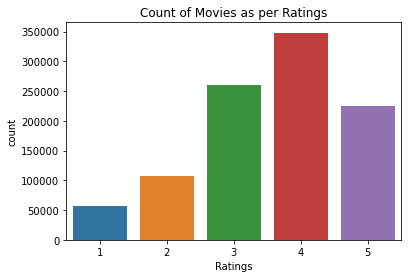

In [22]:
sns.countplot(x='Ratings',data=df)
plt.title('Count of Movies as per Ratings')

##### generating a pie chart to see the percentage of the ratings based on the gender

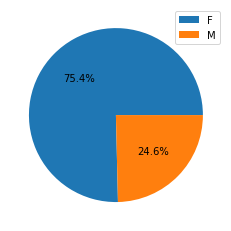

In [23]:
plt.pie(x=df['Gender'].value_counts(),autopct='%1.1f%%')
plt.legend(df.Gender.unique())

##### generating a histogram to divide the users in diffrent age groups and getting their counts

(array([183088., 394766., 198580.,  83490., 111109.]),
 array([10, 20, 30, 40, 50, 60]),
 <BarContainer object of 5 artists>)

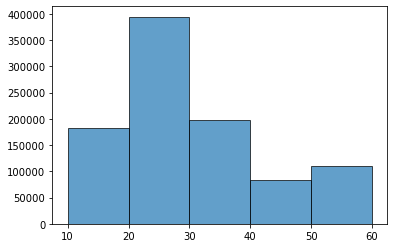

In [24]:
plt.hist(df.Age, bins=[10,20,30,40,50,60], edgecolor='black', alpha=0.7)

##### creating a new column that categorizes people in different age groups

In [25]:
df[df['Age'].all() in [0,10],'Age Group']='0-10'
df[df['Age'].all() in [11,20],'Age Group']='11-20'
df[df['Age'].all() in [21,30],'Age Group']='21-30'
df[df['Age'].all() in [31,40],'Age Group']='31-40'
df[df['Age'].all() in [41,50],'Age Group']='41-50'
df[df['Age'].all() in [51,60],'Age Group']='51-60'

In [26]:
df.head()

,MovieID,MovieName,Category,ID,Ratings,Timestamp,Gender,Age,occupation,Zipcode,"(False, Age Group)"
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,F,35,1,95370,51-60
1,7,Sabrina (1995),Comedy|Romance,10,4,978227763,F,35,1,95370,51-60
2,24,Powder (1995),Drama|Sci-Fi,10,3,978230586,F,35,1,95370,51-60
3,32,Twelve Monkeys (1995),Drama|Sci-Fi,10,5,979168160,F,35,1,95370,51-60
4,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,978230090,F,35,1,95370,51-60


##### creating 2 variables one of which contains the features and the other contains the target value

In [27]:
x=df[['MovieID','Age']]

In [28]:
y=df['Ratings']

##### splitting the data into training and testing set

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

##### Model creation, training the model, predicting values through them and then checking their accuracy

In [30]:
lr=LogisticRegression()

In [31]:
dtc=DecisionTreeClassifier()

In [32]:
r_forest= RandomForestClassifier(n_estimators=100)

In [33]:
kmeans=KMeans(n_clusters=5)

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
p1=lr.predict(x_test)

In [36]:
acc_1=accuracy_score(y_test,p1)

In [37]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
p2=dtc.predict(x_test)

In [39]:
acc_2=accuracy_score(y_test,p2)

In [ ]:
r_forest.fit(x_train,y_train)

In [ ]:
p3=r_forest.predict(x_test)

In [ ]:
acc_3=accuracy_score(y_test,p3)

In [ ]:
kmeans.fit(x_train,y_train)

In [ ]:
p4=kmeans.predict(x_test)

In [ ]:
acc_4=accuracy_score(y_test,p4)

In [ ]:
matrix=pd.DataFrame({'Model':['Logistic Regression','Decision Tree Classifier','Random Forest','KMeans'],'Accuracy Score':[acc_1,acc_2,acc_3,acc_4]})

In [ ]:
matrix

##### from this we can see that all the models perform poorly but in comparison of these 4 models, The Random Forest Classifier is better among all